# Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.shape

(13320, 9)

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.isnull().sum()/df.shape[0]*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [8]:
df1=df.drop(['society'],axis=1)

In [9]:
df1.shape

(13320, 8)

In [10]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


# Filling Null Values

In [11]:
df1.isnull().sum()/df1.shape[0]*100

area_type       0.000000
availability    0.000000
location        0.007508
size            0.120120
total_sqft      0.000000
bath            0.548048
balcony         4.572072
price           0.000000
dtype: float64

<AxesSubplot:>

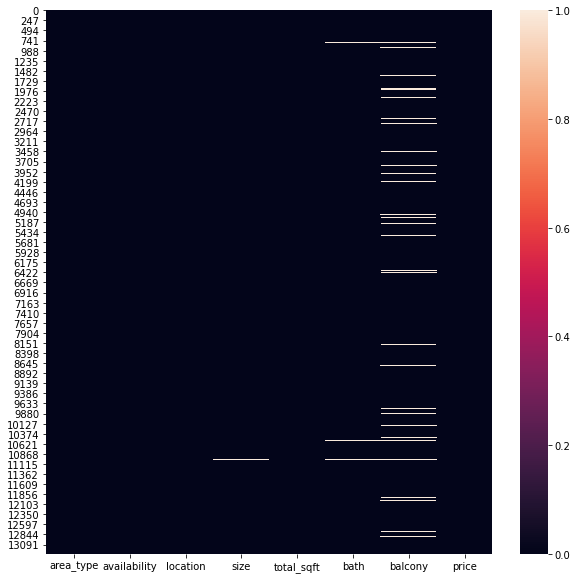

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.isnull())

In [13]:
df1['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [14]:
df1['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [15]:
df1['balcony'].isnull().sum()

609

In [16]:
df1['balcony'].median()

2.0

In [17]:
df1['balcony'].mean()

1.5843757375501535

In [18]:
df1['balcony'].mode()

0    2.0
dtype: float64

In [19]:
df1['balcony'].fillna(2,inplace=True)

In [20]:
df1.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [21]:
df1[['location','size']].isnull().sum()

location     1
size        16
dtype: int64

In [22]:
df1['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [23]:
df1['location'].value_counts()

Whitefield                540
Sarjapur  Road            399
Electronic City           302
Kanakpura Road            273
Thanisandra               234
                         ... 
Duddanahalli                1
Near Electronic City,       1
Shakthi Nagar               1
KG Halli                    1
M.G Road                    1
Name: location, Length: 1305, dtype: int64

In [24]:
z=df1['location'].mode()[0]
z

'Whitefield'

In [25]:
df1['location'].fillna(z,inplace=True)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13304 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       13320 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [27]:
df1.isnull().sum()

area_type        0
availability     0
location         0
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [28]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [29]:
df1['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
14 BHK           1
19 BHK           1
43 Bedroom       1
18 Bedroom       1
27 BHK           1
16 BHK           1
12 Bedroom       1
13 BHK           1
Name: size, dtype: int64

In [30]:
df1['size'].fillna('2 BHK',inplace=True)

In [31]:
p=[]
for i in df1['size']:
    k=i.split()
    num1=int(k[0])
    if k[1]=="BHK":
        num1+=2
    elif k[1]=="RK":
        num1+=1
    p.append(int(num1))

In [32]:
df1['rooms']=p

In [33]:
df1['rooms'].value_counts()

4     6041
5     4607
3     1085
6      782
2      342
7      142
8      114
1      105
9       63
10      17
11      10
12       3
13       2
18       2
16       1
15       1
21       1
29       1
43       1
Name: rooms, dtype: int64

In [34]:
df2=df1.drop(['size'],axis=1)

In [35]:
df2.head()

,area_type,availability,location,total_sqft,bath,balcony,price,rooms
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,4
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,5
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,5
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,4


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   total_sqft    13320 non-null  object 
 4   bath          13247 non-null  float64
 5   balcony       13320 non-null  float64
 6   price         13320 non-null  float64
 7   rooms         13320 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 832.6+ KB


In [37]:
df2.isnull().sum()

area_type        0
availability     0
location         0
total_sqft       0
bath            73
balcony          0
price            0
rooms            0
dtype: int64

In [38]:
df2['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [39]:
df2['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

In [40]:
z=df2['bath'].mode()[0]

In [41]:
df2['bath'].fillna(z,inplace=True)

In [42]:
df2.isnull().sum().sum()

0

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   total_sqft    13320 non-null  object 
 4   bath          13320 non-null  float64
 5   balcony       13320 non-null  float64
 6   price         13320 non-null  float64
 7   rooms         13320 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 832.6+ KB


In [44]:
df2.head()

,area_type,availability,location,total_sqft,bath,balcony,price,rooms
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,4
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,5
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,5
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,4


In [45]:
df2['bath']=df2['bath'].apply(np.int64)
df2['balcony']=df2['balcony'].apply(np.int64)

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   total_sqft    13320 non-null  object 
 4   bath          13320 non-null  int64  
 5   balcony       13320 non-null  int64  
 6   price         13320 non-null  float64
 7   rooms         13320 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 832.6+ KB


In [47]:
df2.head()

,area_type,availability,location,total_sqft,bath,balcony,price,rooms
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2,1,39.07,4
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5,3,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2,3,62.00,5
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3,1,95.00,5
4,Super built-up Area,Ready To Move,Kothanur,1200,2,1,51.00,4


In [48]:
df2['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [49]:
df_dummy=pd.get_dummies(df2,columns=['area_type','availability','location'])
df_dummy

,total_sqft,bath,balcony,price,rooms,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,...,location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled
0,1056,2,1,39.07,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2600,5,3,120.00,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440,2,3,62.00,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521,3,1,95.00,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1200,2,1,51.00,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,3453,4,0,231.00,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,3600,5,2,400.00,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13317,1141,2,1,60.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4689,4,1,488.00,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [51]:
df2['total_sqft'].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
6600      1
1337      1
5515      1
1383      1
4428      1
Name: total_sqft, Length: 2117, dtype: int64

In [52]:
k=[]
for item in df2['total_sqft']:
    try:
        k.append(int(item))
    except:
        try:
            p=item.split("-")
            p1=float(p[0])
            p2=float(p[1])
            p3=(p1+p2)/2
            k.append(int(p3))
        except:
            s=""
            for j in item:
                if j.isnumeric():
                    s+=j
            k.append(int(s))
            
    

In [53]:
df2['area']=k

In [54]:
df3=df2.drop(['total_sqft'],axis=1)

In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   bath          13320 non-null  int64  
 4   balcony       13320 non-null  int64  
 5   price         13320 non-null  float64
 6   rooms         13320 non-null  int64  
 7   area          13320 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 832.6+ KB


In [56]:
df3.head() 

,area_type,availability,location,bath,balcony,price,rooms,area
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1,39.07,4,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,5,3,120.00,4,2600
2,Built-up Area,Ready To Move,Uttarahalli,2,3,62.00,5,1440
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1,95.00,5,1521
4,Super built-up Area,Ready To Move,Kothanur,2,1,51.00,4,1200


# Co-Relations and outliers

# AREA Feature Analysis

In [57]:
df3['area'].describe()

count     13320.000000
mean       2396.818468
std       12958.174712
min           1.000000
25%        1100.000000
50%        1278.000000
75%        1690.000000
max      566584.000000
Name: area, dtype: float64

In [58]:
df3.corr()

,bath,balcony,price,rooms,area
bath,1.000000,0.207970,0.454449,0.709828,0.071166
balcony,0.207970,1.000000,0.124951,0.298303,0.023768
price,0.454449,0.124951,1.000000,0.242039,0.095890
rooms,0.709828,0.298303,0.242039,1.000000,0.057895
area,0.071166,0.023768,0.095890,0.057895,1.000000


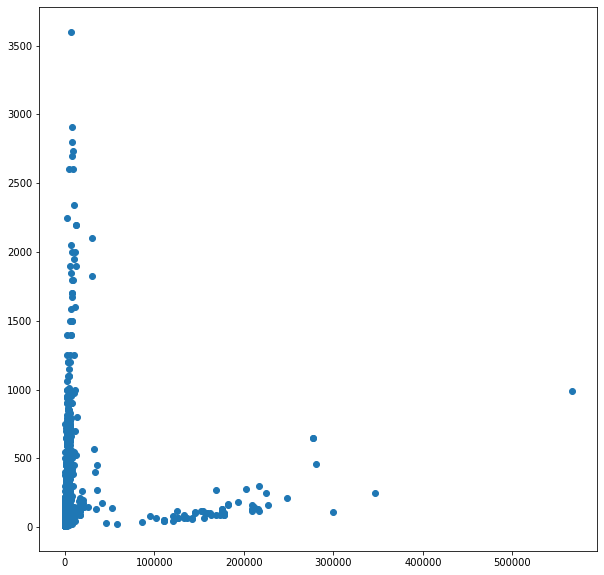

In [59]:
plt.figure(figsize=(10,10))
plt.scatter(df3['area'],df3['price'])

(array([1.326e+04, 8.000e+00, 2.200e+01, 2.200e+01, 5.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.000000e+00, 5.665930e+04, 1.133176e+05, 1.699759e+05,
        2.266342e+05, 2.832925e+05, 3.399508e+05, 3.966091e+05,
        4.532674e+05, 5.099257e+05, 5.665840e+05]),
 <BarContainer object of 10 artists>)

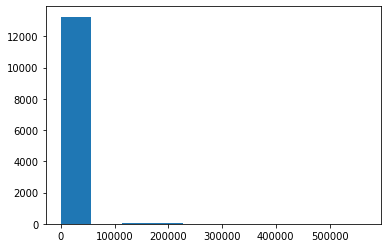

In [60]:
plt.hist(df3['area'])

In [61]:
df3['area'].median()

1278.0

In [62]:
df3[df3['area']<=6000].shape[0]/df3.shape[0]*100

98.68618618618619

In [63]:
df31=df3[df3['area']<=6000]
df31.shape

(13145, 8)

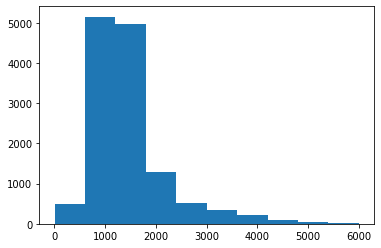

In [64]:
plt.hist(df31['area'])
plt.show()

In [65]:
df31['area'].describe()

count    13145.000000
mean      1499.581134
std        757.462989
min          1.000000
25%       1100.000000
50%       1270.000000
75%       1660.000000
max       6000.000000
Name: area, dtype: float64

<AxesSubplot:xlabel='area'>

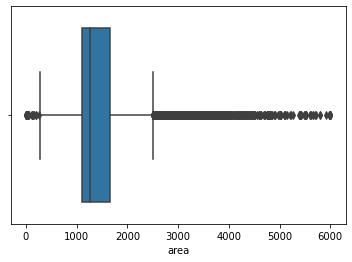

In [66]:
sns.boxplot(x=df31['area'])

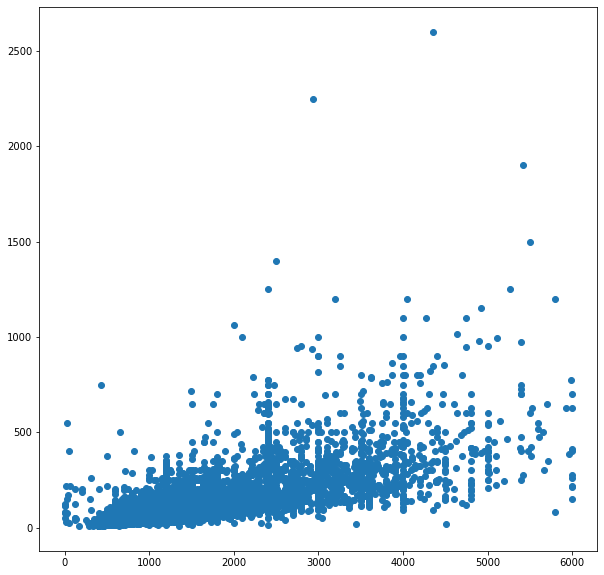

In [67]:
plt.figure(figsize=(10,10))
plt.scatter(df31['area'],df31['price'])

In [68]:
df31.corr()

,bath,balcony,price,rooms,area
bath,1.000000,0.212430,0.500131,0.695578,0.516292
balcony,0.212430,1.000000,0.133029,0.308089,0.224881
price,0.500131,0.133029,1.000000,0.262731,0.693059
rooms,0.695578,0.308089,0.262731,1.000000,0.384843
area,0.516292,0.224881,0.693059,0.384843,1.000000


# Price Analysis

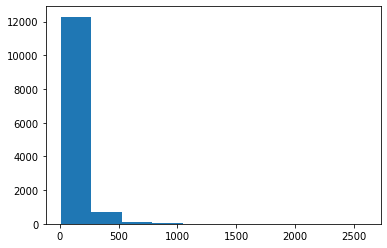

In [69]:
plt.hist(df31['price'])
plt.show()

In [70]:
df31['price'].describe()

count    13145.000000
mean       106.704523
std        113.175396
min          8.000000
25%         50.000000
50%         71.000000
75%        120.000000
max       2600.000000
Name: price, dtype: float64

In [71]:
df31[df31['price']<=500].shape[0]/df31.shape[0]*100

98.60022822365919

In [72]:
df312=df31[df31['price']<=500]
df312.shape

(12961, 8)

In [73]:
df312.corr()

,bath,balcony,price,rooms,area
bath,1.000000,0.221810,0.580429,0.675924,0.523363
balcony,0.221810,1.000000,0.165179,0.330570,0.228849
price,0.580429,0.165179,1.000000,0.322681,0.722553
rooms,0.675924,0.330570,0.322681,1.000000,0.413983
area,0.523363,0.228849,0.722553,0.413983,1.000000


# Rooms Feature Analysis

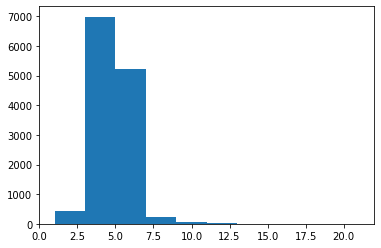

In [74]:
plt.hist(df312['rooms'])
plt.show()

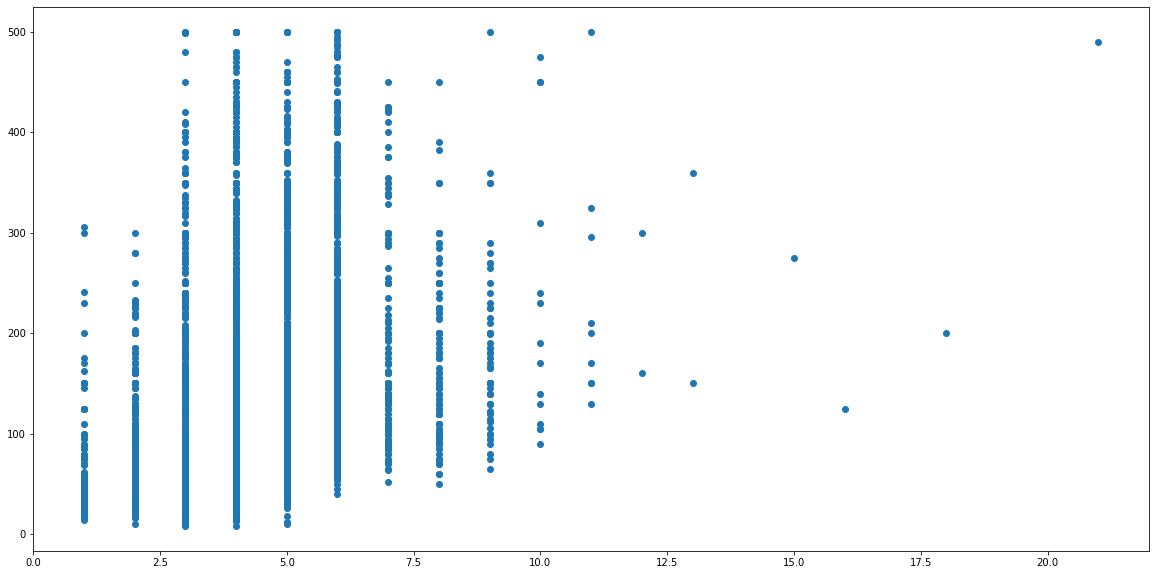

In [75]:
plt.figure(figsize=(20,10))
plt.scatter(df312['rooms'],df312['price'])

In [76]:
df312.shape

(12961, 8)

In [77]:
df312[df312['rooms']<=15].shape[0]/df312.shape[0]*100

99.97685363783658

In [78]:
df3123=df312[df312['rooms']<=15]
df3123.shape

(12958, 8)

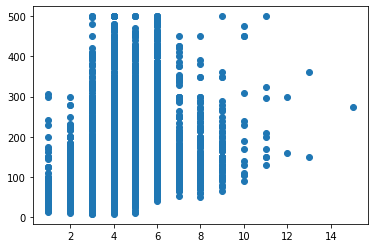

In [79]:
plt.scatter(df3123['rooms'],df3123['price'])

In [80]:
df3123.corr()

,bath,balcony,price,rooms,area
bath,1.000000,0.225731,0.583774,0.665354,0.530981
balcony,0.225731,1.000000,0.165188,0.338050,0.228834
price,0.583774,0.165188,1.000000,0.322039,0.723069
rooms,0.665354,0.338050,0.322039,1.000000,0.422278
area,0.530981,0.228834,0.723069,0.422278,1.000000


# Balcony Feature Analysis

(array([1003.,    0.,    0., 4797.,    0.,    0., 5542.,    0.,    0.,
        1616.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

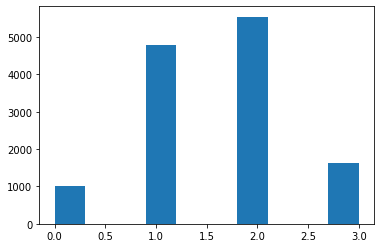

In [81]:
plt.hist(df3123['balcony'])

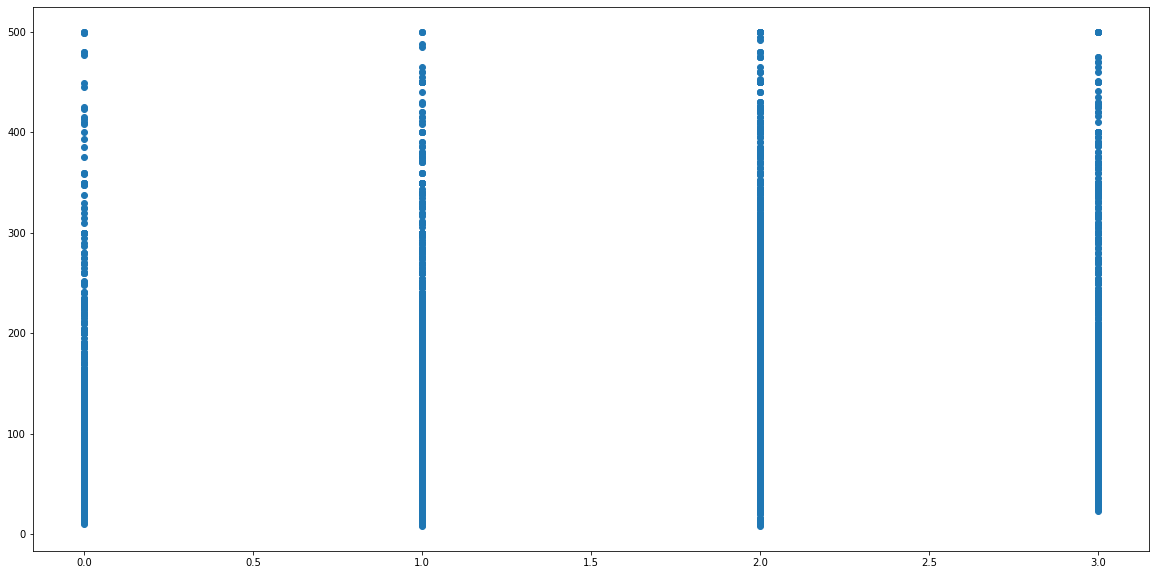

In [82]:
plt.figure(figsize=(20,10))
plt.scatter(df3123['balcony'],df3123['price'])

# Bath Feature Analysis

In [83]:
df3123[df3123['bath']>df3123['rooms']].shape

(313, 8)

In [84]:
df4=pd.get_dummies(df3123,drop_first=True,columns=['area_type'])
df4

,availability,location,bath,balcony,price,rooms,area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,Electronic City Phase II,2,1,39.07,4,1056,0,0,1
1,Ready To Move,Chikka Tirupathi,5,3,120.00,4,2600,0,1,0
2,Ready To Move,Uttarahalli,2,3,62.00,5,1440,0,0,0
3,Ready To Move,Lingadheeranahalli,3,1,95.00,5,1521,0,0,1
4,Ready To Move,Kothanur,2,1,51.00,4,1200,0,0,1
...,...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,4,0,231.00,5,3453,0,0,0
13316,Ready To Move,Richards Town,5,2,400.00,6,3600,0,0,1
13317,Ready To Move,Raja Rajeshwari Nagar,2,1,60.00,4,1141,0,0,0
13318,18-Jun,Padmanabhanagar,4,1,488.00,6,4689,0,0,1


In [85]:
df3123['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [86]:
df3123['area_type'].value_counts()

Super built-up  Area    8631
Built-up  Area          2375
Plot  Area              1875
Carpet  Area              77
Name: area_type, dtype: int64

In [87]:
df3123['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '20-Sep', '18-Mar', '20-Feb', '18-Apr',
       '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec', '17-Aug',
       '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan',
       '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep',
       '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '19-Sep', '17-Apr',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '22-May', '14-Nov', '19-Nov',
       '15-Nov', '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul',
       '16-Sep', '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug',
       '17-Jan', '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [88]:
df3123['availability'].value_counts()

Ready To Move    10301
18-Dec             294
18-May             289
18-Apr             263
18-Aug             198
                 ...  
15-Aug               1
15-Jun               1
14-Jul               1
16-Oct               1
16-Jul               1
Name: availability, Length: 81, dtype: int64

In [89]:
df41=df4.copy()

In [90]:
df41.corr()

,bath,balcony,price,rooms,area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
bath,1.000000,0.225731,0.583774,0.665354,0.530981,-0.010889,0.389775,-0.282694
balcony,0.225731,1.000000,0.165188,0.338050,0.228834,-0.008979,-0.090037,0.117818
price,0.583774,0.165188,1.000000,0.322039,0.723069,-0.008616,0.320365,-0.232043
rooms,0.665354,0.338050,0.322039,1.000000,0.422278,0.009001,-0.156025,0.129853
area,0.530981,0.228834,0.723069,0.422278,1.000000,-0.011230,0.033139,-0.073929
area_type_Carpet Area,-0.010889,-0.008979,-0.008616,0.009001,-0.011230,1.000000,-0.031801,-0.109196
area_type_Plot Area,0.389775,-0.090037,0.320365,-0.156025,0.033139,-0.031801,1.000000,-0.580910
area_type_Super built-up Area,-0.282694,0.117818,-0.232043,0.129853,-0.073929,-0.109196,-0.580910,1.000000


In [91]:
df41['availability_ready_to_move']=np.where(df4['availability']==("Ready To Move" or "Immediate Possession"),1,0)

In [92]:
df41

,availability,location,bath,balcony,price,rooms,area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_ready_to_move
0,19-Dec,Electronic City Phase II,2,1,39.07,4,1056,0,0,1,0
1,Ready To Move,Chikka Tirupathi,5,3,120.00,4,2600,0,1,0,1
2,Ready To Move,Uttarahalli,2,3,62.00,5,1440,0,0,0,1
3,Ready To Move,Lingadheeranahalli,3,1,95.00,5,1521,0,0,1,1
4,Ready To Move,Kothanur,2,1,51.00,4,1200,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,4,0,231.00,5,3453,0,0,0,1
13316,Ready To Move,Richards Town,5,2,400.00,6,3600,0,0,1,1
13317,Ready To Move,Raja Rajeshwari Nagar,2,1,60.00,4,1141,0,0,0,1
13318,18-Jun,Padmanabhanagar,4,1,488.00,6,4689,0,0,1,0


In [93]:
df5=df41.drop(['availability'],axis=1)

In [94]:
df5_location=df5['location'].value_counts()
df5_location.value_counts()[:20]

1     472
2     173
3     129
4      77
5      56
6      40
7      35
8      30
9      19
12     17
13     16
16     12
11     12
10     11
14     10
17      8
22      7
24      7
43      6
26      6
Name: location, dtype: int64

In [95]:
location_index=df5_location[df5_location>50].index
location_index

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Thanisandra', 'Yelahanka', 'Uttarahalli', 'Marathahalli', 'Hebbal',
       'Raja Rajeshwari Nagar', 'Hennur Road', '7th Phase JP Nagar',
       'Bannerghatta Road', 'Haralur Road', 'Electronic City Phase II',
       'Chandapura', 'Bellandur', 'Rajaji Nagar', 'KR Puram', 'Hoodi',
       'Electronics City Phase 1', 'Yeshwanthpur', 'Begur Road', 'Sarjapur',
       'Kasavanhalli', 'Banashankari', 'Harlur', 'Hormavu', 'Ramamurthy Nagar',
       'Kengeri', 'Old Madras Road', 'Varthur', 'JP Nagar', 'Koramangala',
       'Hosa Road', 'Kothanur', 'Kaggadasapura', 'Nagarbhavi', 'Jakkur',
       'Thigalarapalya', 'Akshaya Nagar', 'TC Palaya', '8th Phase JP Nagar',
       'Rachenahalli', 'Hennur', 'Jigani', 'Budigere', 'HSR Layout',
       'Jalahalli', 'Hulimavu', 'Panathur', 'Bisuvanahalli'],
      dtype='object')

In [96]:
df6=df5.copy()
for item in location_index:
    df6['location_'+item]=np.where(df6['location']==item,1,0)
df6.head()

,location,bath,balcony,price,rooms,area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_ready_to_move,...,location_8th Phase JP Nagar,location_Rachenahalli,location_Hennur,location_Jigani,location_Budigere,location_HSR Layout,location_Jalahalli,location_Hulimavu,location_Panathur,location_Bisuvanahalli
0,Electronic City Phase II,2,1,39.07,4,1056,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,5,3,120.00,4,2600,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,2,3,62.00,5,1440,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3,1,95.00,5,1521,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2,1,51.00,4,1200,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df_final=df6.drop(['location'],axis=1)
df_final.head()

,bath,balcony,price,rooms,area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_ready_to_move,location_Whitefield,...,location_8th Phase JP Nagar,location_Rachenahalli,location_Hennur,location_Jigani,location_Budigere,location_HSR Layout,location_Jalahalli,location_Hulimavu,location_Panathur,location_Bisuvanahalli
0,2,1,39.07,4,1056,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,3,120.00,4,2600,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,62.00,5,1440,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,95.00,5,1521,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,51.00,4,1200,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df_final.corr()

,bath,balcony,price,rooms,area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_ready_to_move,location_Whitefield,...,location_8th Phase JP Nagar,location_Rachenahalli,location_Hennur,location_Jigani,location_Budigere,location_HSR Layout,location_Jalahalli,location_Hulimavu,location_Panathur,location_Bisuvanahalli
bath,1.000000,0.225731,0.583774,0.665354,0.530981,-0.010889,0.389775,-0.282694,0.084243,0.000465,...,0.002432,-0.021014,-0.020582,0.017133,-0.015239,0.007035,-0.008252,-0.011250,-0.025853,-0.032918
balcony,0.225731,1.000000,0.165188,0.338050,0.228834,-0.008979,-0.090037,0.117818,0.117025,0.008403,...,-0.000266,0.019664,-0.007371,0.036738,-0.000573,0.010870,-0.000281,0.007323,-0.020860,-0.042358
price,0.583774,0.165188,1.000000,0.322039,0.723069,-0.008616,0.320365,-0.232043,0.082516,0.023610,...,-0.016616,-0.021070,-0.020486,-0.018798,-0.022772,0.001961,-0.002886,-0.009494,-0.018820,-0.044520
rooms,0.665354,0.338050,0.322039,1.000000,0.422278,0.009001,-0.156025,0.129853,0.037865,-0.022352,...,0.001501,-0.003648,-0.008889,0.010898,-0.007375,0.008000,-0.003099,-0.018227,-0.009712,0.022014
area,0.530981,0.228834,0.723069,0.422278,1.000000,-0.011230,0.033139,-0.073929,0.028499,0.058778,...,-0.017789,-0.010401,-0.003147,-0.017504,-0.009719,0.000888,-0.006375,-0.013830,-0.019048,-0.039191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
location_HSR Layout,0.007035,0.010870,0.001961,0.008000,0.000888,-0.004955,-0.009174,0.004354,0.032547,-0.013103,...,-0.004260,-0.004222,-0.004184,-0.004146,-0.004146,1.000000,-0.004068,-0.004068,-0.004028,-0.004028
location_Jalahalli,-0.008252,-0.000281,-0.002886,-0.003099,-0.006375,-0.004908,-0.005289,0.008707,0.002003,-0.012979,...,-0.004219,-0.004182,-0.004144,-0.004106,-0.004106,-0.004068,1.000000,-0.004029,-0.003990,-0.003990
location_Hulimavu,-0.011250,0.007323,-0.009494,-0.018227,-0.013830,0.010975,-0.005289,0.000942,0.017120,-0.012979,...,-0.004219,-0.004182,-0.004144,-0.004106,-0.004106,-0.004068,-0.004029,1.000000,-0.003990,-0.003990
location_Panathur,-0.025853,-0.020860,-0.018820,-0.009712,-0.019048,-0.004860,-0.025855,0.034054,-0.029132,-0.012853,...,-0.004178,-0.004141,-0.004104,-0.004066,-0.004066,-0.004028,-0.003990,-0.003990,1.000000,-0.003951


In [99]:
df_final.shape

(12958, 61)

In [100]:
X=df_final.drop(['price'],axis=1)
y=df_final['price']

# Train-Test Split

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10366, 60)
(2592, 60)
(10366,)
(2592,)


# Standard Scaler

In [102]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
sc=StandardScaler() 
sc.fit(X_train) 
X_train_sc=sc.transform(X_train) 
X_test_sc=sc.transform(X_test)

In [103]:
X_train_sc=pd.DataFrame(X_train_sc)
X_test_sc=pd.DataFrame(X_test_sc)

# Linear Regression Model

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(X_train_sc,y_train)
lr_score=lr.score(X_test_sc,y_test)
rmse=np.sqrt(mean_squared_error(y_test,lr.predict(X_test_sc)))
lr_score,rmse

(0.6470072083763663, 48.11146716064956)

# DecisionTreeRegressor Model

In [105]:
dt=DecisionTreeRegressor()
dt.fit(X_train_sc,y_train)
dt_score=dt.score(X_test_sc,y_test)
dt_score

0.5268177933152528

# XGBRegressor Model

In [106]:
xgb=xgboost.XGBRegressor()
xgb.fit(X_train_sc,y_train)
xgb_score=xgb.score(X_test_sc,y_test)
rmse=np.sqrt(mean_squared_error(y_test,xgb.predict(X_test_sc)))
xgb_score,rmse

(0.713766267411519, 43.32375482886866)

# Random Forest Regressor Model

In [107]:
rfr=RandomForestRegressor()
rfr.fit(X_train_sc,y_train)
rfr_score=rfr.score(X_test_sc,y_test)
rmse=np.sqrt(mean_squared_error(y_test,rfr.predict(X_test_sc)))
rfr_score,rmse

(0.6866777983625885, 45.32744788832353)

# Save and Load XGBRegressor model

In [108]:
import joblib

In [109]:
joblib.dump(xgb,'predict the price')

['predict the price']

In [110]:
final_model=joblib.load('predict the price')

# Predict the price of new house

In [111]:
final_model.predict(X_test_sc)

array([49.26386 , 52.437534, 71.71712 , ..., 47.97285 , 77.04853 ,
       51.381523], dtype=float32)